In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('../data/concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


In [3]:
circ.shape

(500, 3)

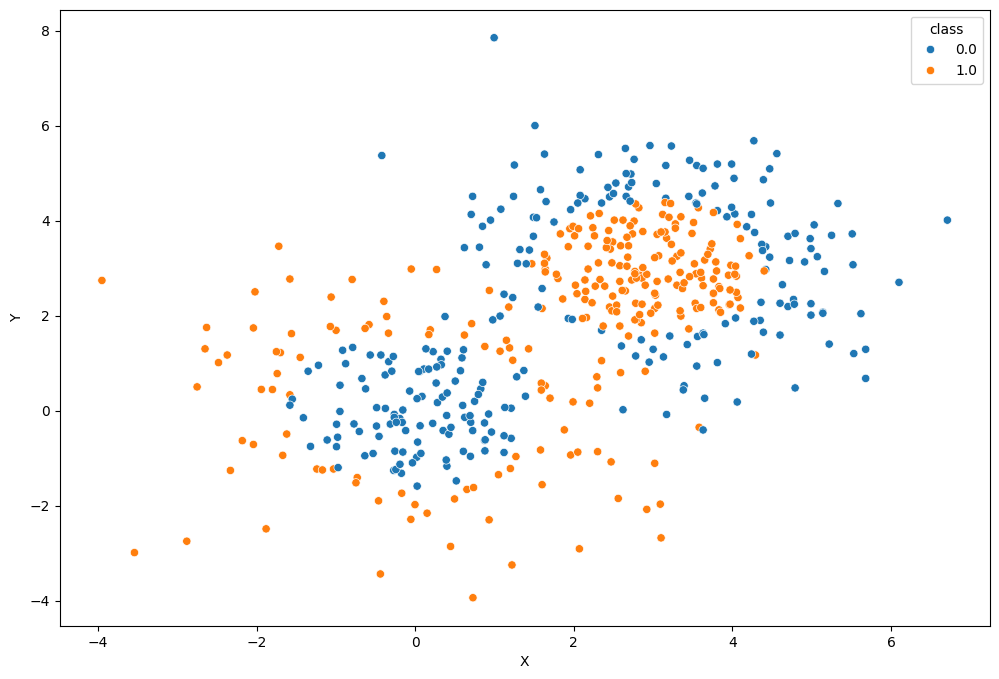

In [4]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

In [5]:
X = circ.drop("class", axis=1)
Y = circ["class"]

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [6]:
from sklearn.linear_model import LogisticRegression

### Your code is here

LR_model = LogisticRegression()

LR_model.fit(X, Y)

print(f"Accuracy: {np.mean(LR_model.predict(X) == Y):.3f}")


Accuracy: 0.424


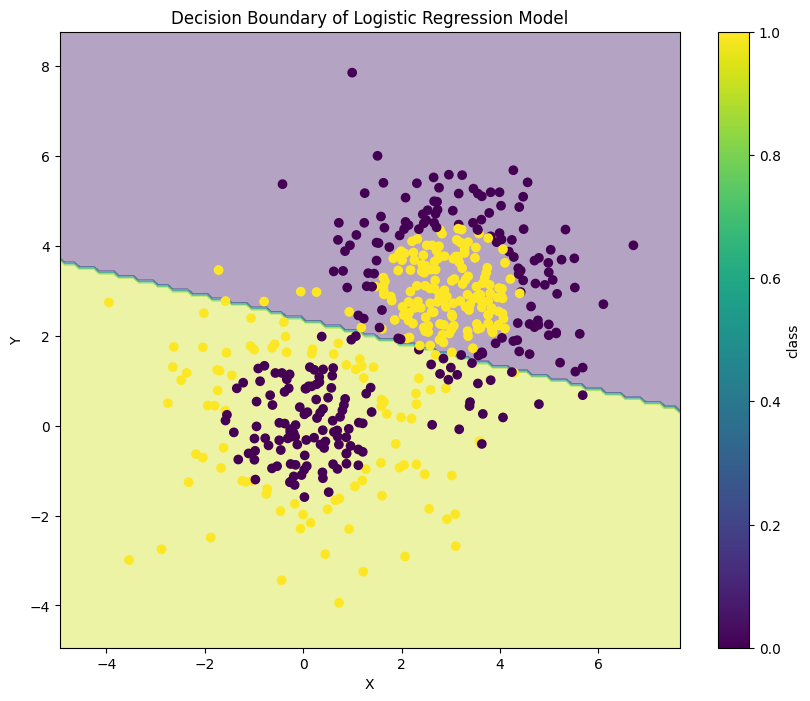

In [7]:
# Генерация сетки для пространства признаков
x_min, x_max = circ['X'].min() - 1, circ['X'].max() + 1
y_min, y_max = circ['Y'].min() - 1, circ['Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Предсказание классов для каждой точки на сетке
Z = LR_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Построение контурного графика
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(circ['X'], circ['Y'], c=circ['class'], cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundary of Logistic Regression Model')
plt.colorbar(label='class')
plt.show()

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [8]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

### Your code is here

KNN_model_dict = {}

for index, k in enumerate(all_k):

    KNN_model = KNeighborsClassifier(n_neighbors=k)

    KNN_model.fit(X_train, y_train)

    KNN_model_dict[f"n_{k}"] = {"model": KNN_model}

    y_preds_train = KNN_model.predict(X_train)
    y_preds_test = KNN_model.predict(X_test)

    acc_train = round(np.mean(y_train == y_preds_train), 3)
    acc_test = round(np.mean(y_test == y_preds_test), 3)

    KNN_model_dict[f"n_{k}"]["acc_train"] = acc_train
    KNN_model_dict[f"n_{k}"]["acc_test"] = acc_test


In [11]:
KNN_model_dict

{'n_1': {'model': KNeighborsClassifier(n_neighbors=1),
  'acc_train': 1.0,
  'acc_test': 0.89},
 'n_3': {'model': KNeighborsClassifier(n_neighbors=3),
  'acc_train': 0.948,
  'acc_test': 0.87},
 'n_10': {'model': KNeighborsClassifier(n_neighbors=10),
  'acc_train': 0.915,
  'acc_test': 0.85},
 'n_30': {'model': KNeighborsClassifier(n_neighbors=30),
  'acc_train': 0.852,
  'acc_test': 0.74},
 'n_40': {'model': KNeighborsClassifier(n_neighbors=40),
  'acc_train': 0.8,
  'acc_test': 0.75},
 'n_60': {'model': KNeighborsClassifier(n_neighbors=60),
  'acc_train': 0.692,
  'acc_test': 0.73}}

In [12]:
best_train_score = 0
best_test_score = 0
for model_name, model_info in KNN_model_dict.items():
    if model_info['acc_train'] >= best_train_score:
        best_train_score = model_info['acc_train']
        best_train_model = model_info['model']
    if model_info['acc_test'] >= best_test_score:
        best_test_score = model_info['acc_test']
        best_test_model = model_info['model']

In [13]:
display(f"Лучший Accuracy на трейне: {best_train_score}, с количеством соседей n={best_train_model.get_params()['n_neighbors']}")
display(f"Лучший Accuracy на тесте: {best_test_score}, с количеством соседей n={best_test_model.get_params()['n_neighbors']}")

'Лучший Accuracy на трейне: 1.0, с количеством соседей n=1'

'Лучший Accuracy на тесте: 0.89, с количеством соседей n=1'

**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [14]:
model_dict = {}

for model_name, model_info in KNN_model_dict.items():
    model_dict[model_name] = model_info['model']

model_dict

{'n_1': KNeighborsClassifier(n_neighbors=1),
 'n_3': KNeighborsClassifier(n_neighbors=3),
 'n_10': KNeighborsClassifier(n_neighbors=10),
 'n_30': KNeighborsClassifier(n_neighbors=30),
 'n_40': KNeighborsClassifier(n_neighbors=40),
 'n_60': KNeighborsClassifier(n_neighbors=60)}

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
import pandas as pd
from IPython.display import display

def visualize_decision_regions(clfs_dict, X, Y):
    """
    Визуализирует решающие поверхности для каждой модели классификации из словаря обученных моделей,
    а также выводит сводную таблицу с метриками классификации для каждой модели.

    Параметры:
    - clfs_dict: dict, словарь обученных моделей классификации, где ключ - имя модели, а значение - сама модель.
    - X: массив признаков, shape (n_samples, n_features), признаки для предсказания.
    - Y: массив меток, shape (n_samples,), истинные метки классов.

    Возвращает:
    - None: функция выводит графики решающих поверхностей и сводную таблицу с метриками классификации.
    """
    num_models = len(clfs_dict)
    num_rows = num_models // 3 + (num_models % 3 > 0)
    gs = gridspec.GridSpec(num_rows, 3)
    fig = plt.figure(figsize=(15, 5 * num_rows))

    labels = [clf_name for clf_name in clfs_dict.keys()]
    all_clfs = [clf for clf in clfs_dict.values()]
    metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
    
    for clf, lab, grd in zip(all_clfs, labels, itertools.product(range(num_rows), range(3))):
        ax = plt.subplot(gs[grd[0], grd[1]])
        plot_decision_regions(X=X, y=Y, clf=clf, legend=2, ax=ax)
        plt.title(lab)
        
        # Вычисляем метрики классификации
        y_pred = clf.predict(X)
        report = classification_report(Y, y_pred, output_dict=True)
        
        # Добавляем метрики в словарь
        metrics['Model'].append(lab)
        metrics['Accuracy'].append(report['accuracy'])
        metrics['Precision'].append(report['macro avg']['precision'])
        metrics['Recall'].append(report['macro avg']['recall'])
        metrics['F1-Score'].append(report['macro avg']['f1-score'])

    plt.tight_layout()
    plt.show()
    
    # Создаем DataFrame с метриками и сортируем по убыванию Accuracy
    metrics_df = pd.DataFrame(metrics).sort_values(by='Accuracy', ascending=False)
    
    # Выводим сводную таблицу
    display("Classification Report:")
    display(metrics_df)


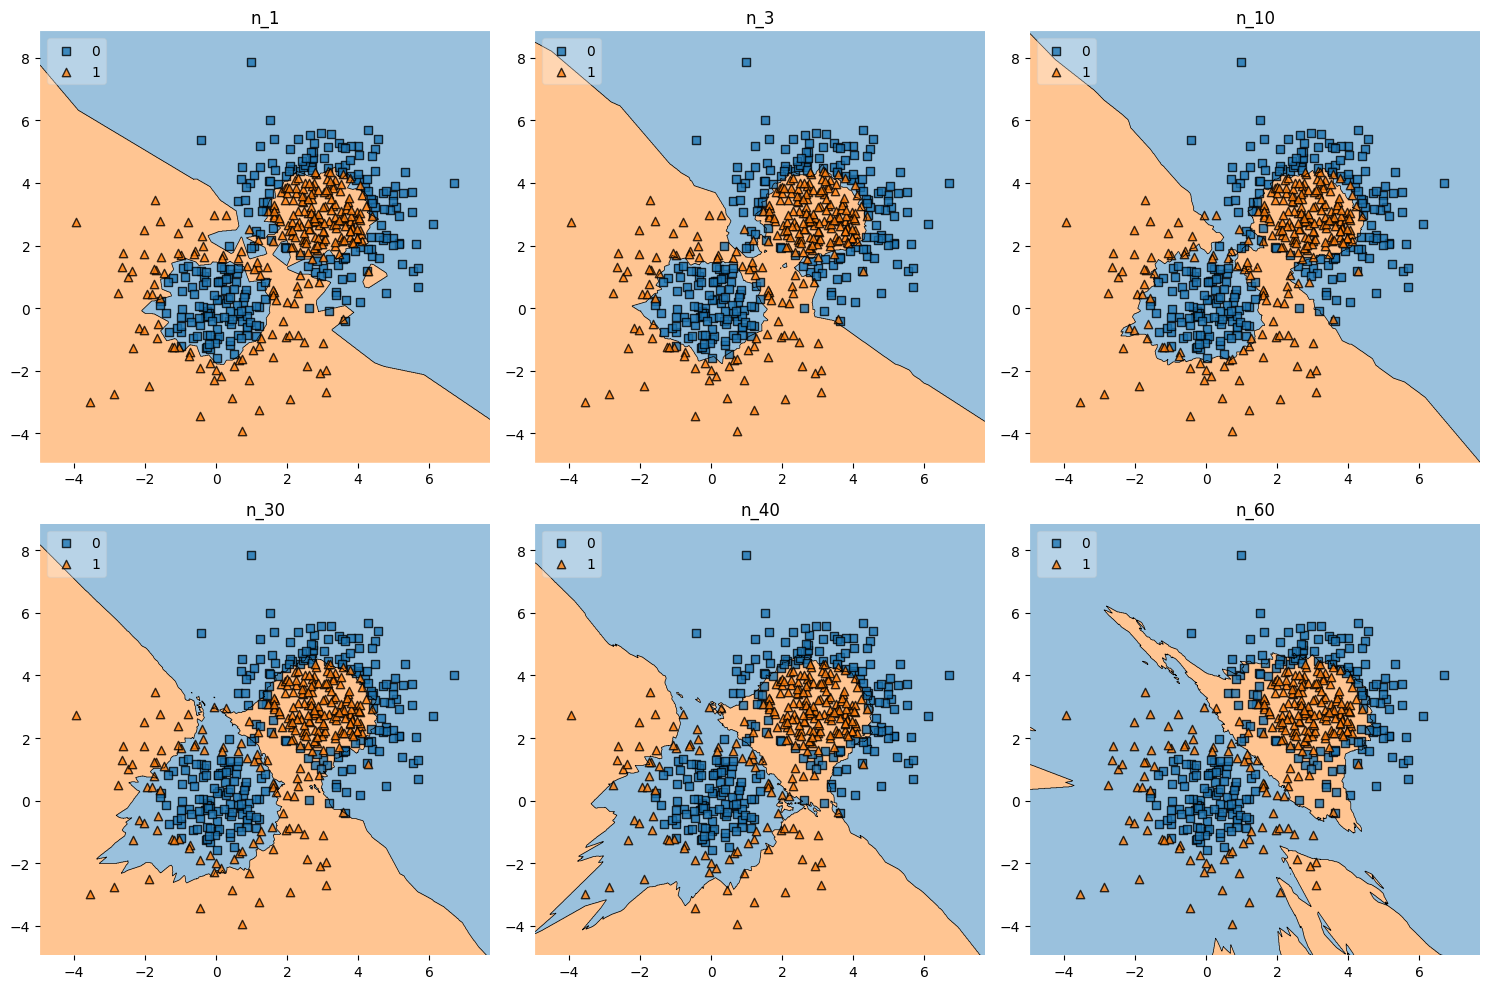

'Classification Report:'

,Model,Accuracy,Precision,Recall,F1-Score
0,n_1,0.978,0.978069,0.978,0.977999
1,n_3,0.932,0.932000,0.932,0.932000
2,n_10,0.902,0.906061,0.902,0.901754
3,n_30,0.830,0.832345,0.830,0.829700
4,n_40,0.790,0.792929,0.790,0.789474
5,n_60,0.700,0.700823,0.700,0.699692


In [20]:
visualize_decision_regions(model_dict, X, y)

1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [23]:
df = pd.read_csv('../data/processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [25]:
### Your code is here

from sklearn.pipeline import Pipeline

### KNN на не отнормированных параметрах

KNN_model_dict_orig = {}

all_k = [1, 5, 10]

metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

for index, k in enumerate(all_k):

    KNN_pipe_orig = Pipeline([
        ("KNN", KNeighborsClassifier(n_neighbors=k))
    ])

    # Обучаем модель и добавляем ее в словарь
    KNN_pipe_orig.fit(X_train, y_train)
    KNN_model_dict_orig[f"KNN_n={k}"] = KNN_pipe_orig

    y_pred = KNN_pipe_orig.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    metrics['Model'].append(f"KNN_n={k}")
    metrics['Accuracy'].append(report['accuracy'])
    metrics['Precision'].append(report['macro avg']['precision'])
    metrics['Recall'].append(report['macro avg']['recall'])
    metrics['F1-Score'].append(report['macro avg']['f1-score'])

metrics_df_orig = pd.DataFrame(metrics).sort_values(by='Accuracy', ascending=False)
display(metrics_df_orig)

,Model,Accuracy,Precision,Recall,F1-Score
2,KNN_n=10,0.470360,0.453918,0.435800,0.436619
1,KNN_n=5,0.443170,0.433566,0.424999,0.420095
0,KNN_n=1,0.438195,0.418987,0.419201,0.418126


In [26]:
### KNN на отнормированных параметрах

from sklearn.preprocessing import StandardScaler

KNN_model_dict_norm = {}

all_k = [1, 5, 10]

metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

for index, k in enumerate(all_k):

    KNN_pipe_norm = Pipeline([
        ("scaler", StandardScaler()),
        ("KNN", KNeighborsClassifier(n_neighbors=k))
    ])

    # Обучаем модель и добавляем ее в словарь
    KNN_pipe_norm.fit(X_train, y_train)
    KNN_model_dict_norm[f"KNN_n={k}"] = KNN_pipe_norm

    y_pred = KNN_pipe_norm.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    metrics['Model'].append(f"KNN_n={k}")
    metrics['Accuracy'].append(report['accuracy'])
    metrics['Precision'].append(report['macro avg']['precision'])
    metrics['Recall'].append(report['macro avg']['recall'])
    metrics['F1-Score'].append(report['macro avg']['f1-score'])

metrics_df_norm = pd.DataFrame(metrics).sort_values(by='Accuracy', ascending=False)
display(metrics_df_norm)

,Model,Accuracy,Precision,Recall,F1-Score
2,KNN_n=10,0.660768,0.667929,0.639472,0.647135
1,KNN_n=5,0.630388,0.626457,0.618505,0.619627
0,KNN_n=1,0.564881,0.554372,0.558784,0.556134


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [27]:
### Your code is here

all_k = [1, 5, 10]

metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

for index, k in enumerate(all_k):

    pipe_KNN_Minkovsky = Pipeline([
        ('scaler', StandardScaler()),  # Стандартизация признаков
        ('KNN', KNeighborsClassifier(n_neighbors=k, p=1))  # Модель KNN
    ])

    pipe_KNN_Minkovsky.fit(X_train, y_train)

    y_pred = pipe_KNN_Minkovsky.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    metrics['Model'].append(f"KNN_n={k}")
    metrics['Accuracy'].append(round(report['accuracy'], 3))
    metrics['Precision'].append(round(report['macro avg']['precision'], 3))
    metrics['Recall'].append(round(report['macro avg']['recall'], 3))
    metrics['F1-Score'].append(round(report['macro avg']['f1-score'], 3))

metrics_df_Minkovsky = pd.DataFrame(metrics).sort_values(by='Accuracy', ascending=False)
display(metrics_df_Minkovsky)

,Model,Accuracy,Precision,Recall,F1-Score
2,KNN_n=10,0.661,0.668,0.641,0.648
1,KNN_n=5,0.627,0.623,0.616,0.616
0,KNN_n=1,0.564,0.554,0.558,0.556


**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [28]:
df = pd.read_csv('../data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


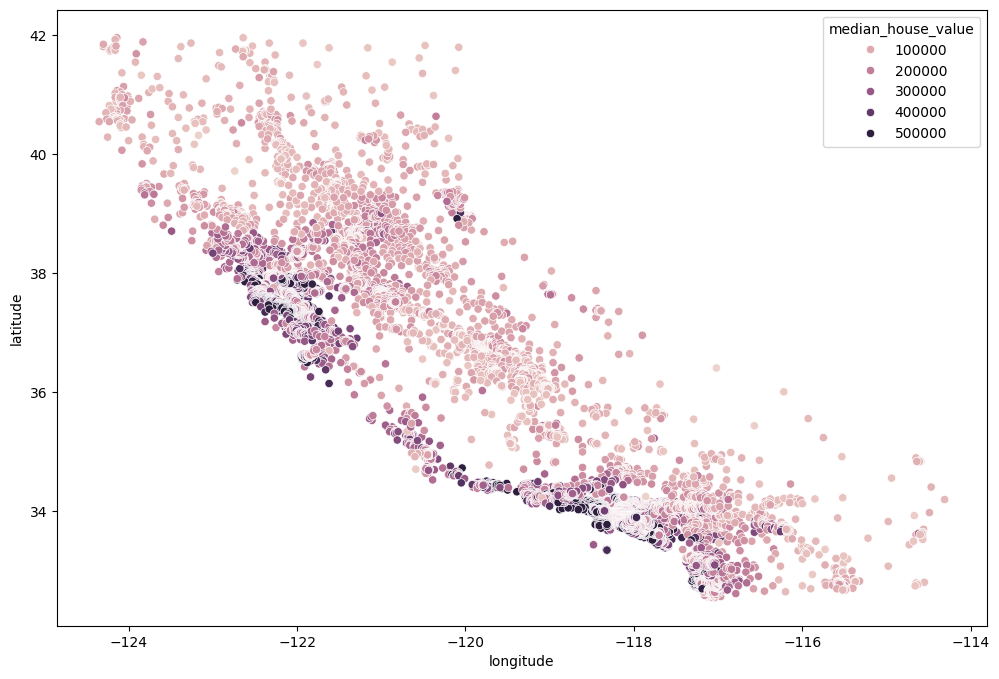

In [30]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot(x=X['longitude'], y=X['latitude'], hue=y);

In [34]:
### Your code is here

### LR

from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)

LR_y_preds = LR.predict(X_test)

print(f"RMSE LR на трейне: {(np.mean(LR.predict(X_train) - y_train)**2)**0.5:.3f}")
print(f"RMSE LR на тесте: {(np.mean(LR.predict(X_test) - y_test)**2)**0.5:.3f}")

RMSE LR на трейне: 0.000
RMSE LR на тесте: 2249.252


In [82]:
from sklearn.neighbors import KNeighborsRegressor

all_k = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for k in all_k:
    
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("KNN", KNeighborsRegressor(n_neighbors=k))
    ])

    pipe.fit(X_train, y_train)

    RMSE_train = (np.mean(pipe.predict(X_train) - y_train)**2)**0.5
    RMSE_test = (np.mean(pipe.predict(X_test) - y_test)**2)**0.5

    display(f"KNN with n={k}")
    print(f"RMSE KNN на трейне: {RMSE_train:.3f}")
    print(f"RMSE KNN на тесте: {RMSE_test:.3f}")

    try:
        if RMSE_test < RMSE_best:
                RMSE_best = RMSE_test
                best_model = pipe
    except:
         RMSE_best = RMSE_test

'KNN with n=1'

RMSE KNN на трейне: 297.561
RMSE KNN на тесте: 3074.061


'KNN with n=2'

RMSE KNN на трейне: 1234.268
RMSE KNN на тесте: 2852.536


'KNN with n=3'

RMSE KNN на трейне: 2052.819
RMSE KNN на тесте: 3165.114


'KNN with n=4'

RMSE KNN на трейне: 2360.939
RMSE KNN на тесте: 3098.564


'KNN with n=5'

RMSE KNN на трейне: 2718.459
RMSE KNN на тесте: 3446.663


'KNN with n=6'

RMSE KNN на трейне: 2947.828
RMSE KNN на тесте: 3141.182


'KNN with n=7'

RMSE KNN на трейне: 3228.766
RMSE KNN на тесте: 3232.206


'KNN with n=8'

RMSE KNN на трейне: 3382.721
RMSE KNN на тесте: 3132.329


'KNN with n=9'

RMSE KNN на трейне: 3518.787
RMSE KNN на тесте: 3000.392


In [49]:
best_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('KNN', KNeighborsRegressor(n_neighbors=2))],
 'verbose': False,
 'scaler': StandardScaler(),
 'KNN': KNeighborsRegressor(n_neighbors=2),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'KNN__algorithm': 'auto',
 'KNN__leaf_size': 30,
 'KNN__metric': 'minkowski',
 'KNN__metric_params': None,
 'KNN__n_jobs': None,
 'KNN__n_neighbors': 2,
 'KNN__p': 2,
 'KNN__weights': 'uniform'}

In [102]:
def kernel(distances, h):
    const = 1 / (np.sqrt(2 * np.pi))
    power = (-1/2) * ((distances)**2) / h**2
    return const * np.exp(power)

In [103]:
all_h = [0.02, 0.1, 0.01]

for bandwidth in all_h:
    
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("KNN", KNeighborsRegressor(weights=lambda x: kernel(x, bandwidth), n_neighbors=2))
    ])

    pipe.fit(X_train, y_train)

    RMSE_train = (np.mean(pipe.predict(X_train) - y_train)**2)**0.5
    RMSE_test = (np.mean(pipe.predict(X_test) - y_test)**2)**0.5

    display(f"KNN with bandwidth={bandwidth}")
    print(f"RMSE KNN на трейне: {RMSE_train:.3f}")
    print(f"RMSE KNN на тесте: {RMSE_test:.3f}")

    try:
        if RMSE_test < RMSE_best:
                RMSE_best = RMSE_test
                best_model = pipe
    except:
         RMSE_best = RMSE_test

'KNN with bandwidth=0.02'

RMSE KNN на трейне: 1159.739
RMSE KNN на тесте: 2852.935


'KNN with bandwidth=0.1'

RMSE KNN на трейне: 1250.845
RMSE KNN на тесте: 2855.226


'KNN with bandwidth=0.01'

RMSE KNN на трейне: 920.943
RMSE KNN на тесте: 2780.484


In [96]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('KNN',
   KNeighborsRegressor(n_neighbors=2,
                       weights=<function <lambda> at 0x00000247E36DEE80>))],
 'verbose': False,
 'scaler': StandardScaler(),
 'KNN': KNeighborsRegressor(n_neighbors=2,
                     weights=<function <lambda> at 0x00000247E36DEE80>),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'KNN__algorithm': 'auto',
 'KNN__leaf_size': 30,
 'KNN__metric': 'minkowski',
 'KNN__metric_params': None,
 'KNN__n_jobs': None,
 'KNN__n_neighbors': 2,
 'KNN__p': 2,
 'KNN__weights': <function __main__.<lambda>(x)>}

In [111]:
from sklearn.model_selection import GridSearchCV 

# Определение пайплайна
pipe_KNN = Pipeline([
    ('scaler', StandardScaler()),  # Стандартизация признаков
    ('KNN', KNeighborsRegressor())  # Модель KNN
])

# Определение параметров для GridSearchCV
param_grid = {
    'KNN__n_neighbors': [1, 2, 3],  # Количество соседей
    'KNN__weights': ['uniform', 'distance'] + [lambda x, h=h: kernel(x, h) for h in [0.01, 0.05, 0.1, 0.2]],  # Веса соседей + Гауссовское ядро
    'KNN__p': [0.5, 1, 2],  # Параметр метрики расстояния
}
 
# Создание объекта GridSearchCV
grid_search = GridSearchCV(pipe_KNN,
                           param_grid,
                           cv=5,  # Количество фолдов в кросс-валидации
                           scoring='neg_root_mean_squared_error')

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Подгонка модели на обучающих данных
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка:", grid_search.best_score_)

# Получение лучшей модели
best_pipe_KNN = grid_search.best_estimator_

# Оценка качества на тестовом наборе данных
RMSE_train = (np.mean(best_pipe_KNN.predict(X_train) - y_train)**2)**0.5
RMSE_test = (np.mean(best_pipe_KNN.predict(X_test) - y_test)**2)**0.5
print(f"RMSE KNN на трейне: {RMSE_train:.3f}")
print(f"RMSE KNN на тесте: {RMSE_test:.3f}")

Лучшие параметры: {'KNN__n_neighbors': 3, 'KNN__p': 2, 'KNN__weights': <function <listcomp>.<lambda> at 0x0000024604411440>}
Лучшая оценка: -56387.25700759426
RMSE KNN на трейне: 2142.713
RMSE KNN на тесте: 3640.116


In [110]:
best_pipe_KNN.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('KNN',
   KNeighborsRegressor(n_neighbors=6,
                       weights=<function <listcomp>.<lambda> at 0x00000246044100E0>))],
 'verbose': False,
 'scaler': StandardScaler(),
 'KNN': KNeighborsRegressor(n_neighbors=6,
                     weights=<function <listcomp>.<lambda> at 0x00000246044100E0>),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'KNN__algorithm': 'auto',
 'KNN__leaf_size': 30,
 'KNN__metric': 'minkowski',
 'KNN__metric_params': None,
 'KNN__n_jobs': None,
 'KNN__n_neighbors': 6,
 'KNN__p': 2,
 'KNN__weights': <function __main__.<listcomp>.<lambda>(x, h=0.05)>}